In [59]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import math

In [34]:
#import data
df = pd.read_csv('VTI.csv')
#optimize for N
N_max=20
df.sort_values(by='Date',inplace=True,ascending=True)
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-04-29,150.220001,150.690002,150.130005,150.380005,147.601959,2461500
1,2019-04-30,150.279999,150.600006,149.300003,150.389999,147.611786,2224500
2,2019-05-01,150.800003,150.869995,149.240005,149.270004,146.512451,3761300
3,2019-05-02,149.149994,149.740005,148.059998,149.020004,146.267075,2537800
4,2019-05-03,149.800003,150.699997,149.699997,150.630005,147.847351,2147100


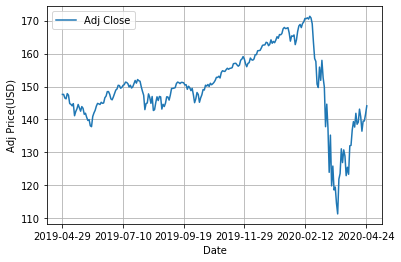

In [35]:
ax=df.plot(x='Date',y='Adj Close',grid=True)
ax.set_xlabel('Date')
ax.set_ylabel('Adj Price(USD)')
plt.show()

In [153]:
#split data into train,validation and test
train_size = int(0.6 * len(df))
validation_size = int(0.2 * len(df))
test_size = int(0.2 * len(df))

df_train = df[:train_size]
df_validation = df[train_size:train_size+validation_size]
df_test = df[train_size+validation_size:]

Text(0, 0.5, 'Prices(USD)')

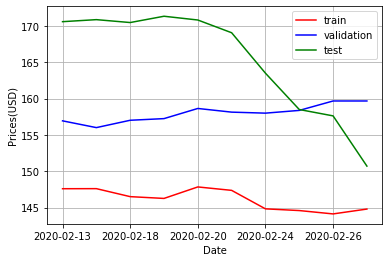

In [154]:
#plot dataframes
ax = df_train.head(10).plot(x='Date',y='Adj Close',grid=True,style='r-')
ax = df_validation.head(10).plot(x='Date',y='Adj Close',grid=True,style='b-',ax=ax)
ax = df_test.head(10).plot(x='Date',y='Adj Close',grid=True,style='g-', ax=ax)
ax.legend(['train','validation','test'])
ax.set_xlabel('Date')
ax.set_ylabel('Prices(USD)')

In [155]:
#estimate moving averages
def estimate_moving_average(dataframe, N):
    """
    Compute the moving average based on the previous N elements.
    
    Inputs
        dataframe: Dataframe including the adjusted prices
        N: Number of previous elements to use. Range of N- 1 to 21
    Outputs
        predicted_list: List of predicted values
    """
    predicted_list = dataframe['Adj Close'].rolling(window=N,min_periods=1).mean()
    return predicted_list

In [157]:
#Get estimates for N=1...21
root_mean_square=list()
#print(df_train)
for N in range(1,N_max+1):
    predicted_list = estimate_moving_average(df_train,N)
    #print(predicted_list)
    rms_temp = math.sqrt(mean_squared_error(df_train['Adj Close'],predicted_list))
    root_mean_square.append(rms_temp)
    
df_square_error=pd.DataFrame(root_mean_square)
df_square_error.index = np.arange(1,N_max+1)
df_square_error.columns = ['Values']

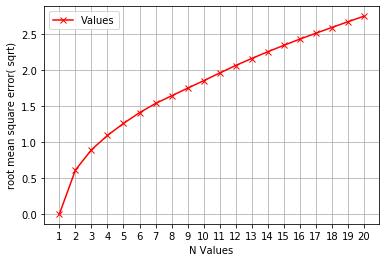

In [158]:
#plot root mean square
ax = df_square_error.plot(y='Values',grid=True,style='rx-',xticks=df_square_error.index)
ax.set_xlabel('N Values')
ax.set_ylabel('root mean square error( sqrt)')
#Based on the visualization set N to 2 since N=1 does not consider series of values
N_optimum =2

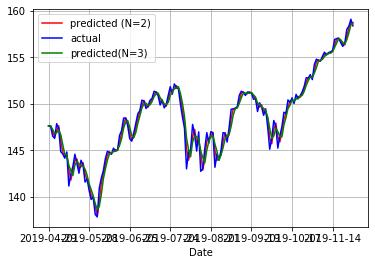

In [184]:
#plot training set for N_optimum
predict_list2 = estimate_moving_average(df_train,N_optimum)
#N=3 just to get an idea
predict_list3 = estimate_moving_average(df_train,3)
predict_df = pd.DataFrame(predict_list2)
predict_df3 = pd.DataFrame(predict_list3)
predict_df['Date'] = df_train['Date']
predict_df3['Date'] = df_train['Date']
ax = predict_df.plot(x='Date',y='Adj Close',grid=True,style='r-')
ax = df_train.plot(x='Date',y='Adj Close',ax=ax,style='b-')
ax = predict_df3.plot(x='Date',y='Adj Close',grid=True,style='g-',ax=ax)
ax.legend(['predicted (N=2)','actual','predicted(N=3)'])